# Macroeconometrics Problem Set 3 
André Filipe Silva 26005<br>
João Seixo 40510<br>
Márcia Serra 41221

## Part 1

In [3]:
library(xlsx)
library(vars)
library(urca)
library(tseries)
library(knitr) 

### EXERCISE 1A

In [4]:
data=read.xlsx("ps3_data_Q1_2020.xlsx", header=TRUE, sheetIndex =1)
df=data.frame("G_Health"=data[,3], "Revenue_Total"=data[,2])
dfts=ts(df)
row.names(dfts)=c(1970:2018)

In [5]:
dfts[1:5,] 

# Displaying part of the data frame for easier visualization of our results in this question

,G_Health,Revenue_Total
1970,2.798418,29.80710
1971,2.970855,29.27349
1972,3.094316,30.40609
1973,3.181722,30.63798
1974,3.422005,31.23342


### EXERCISE 1B

Note: When you say "test for all series", we are assuming it is for all the series we included in the data frame (G_health and Revenue_Total).

__Testing for Health expenditure__ (G_Health)

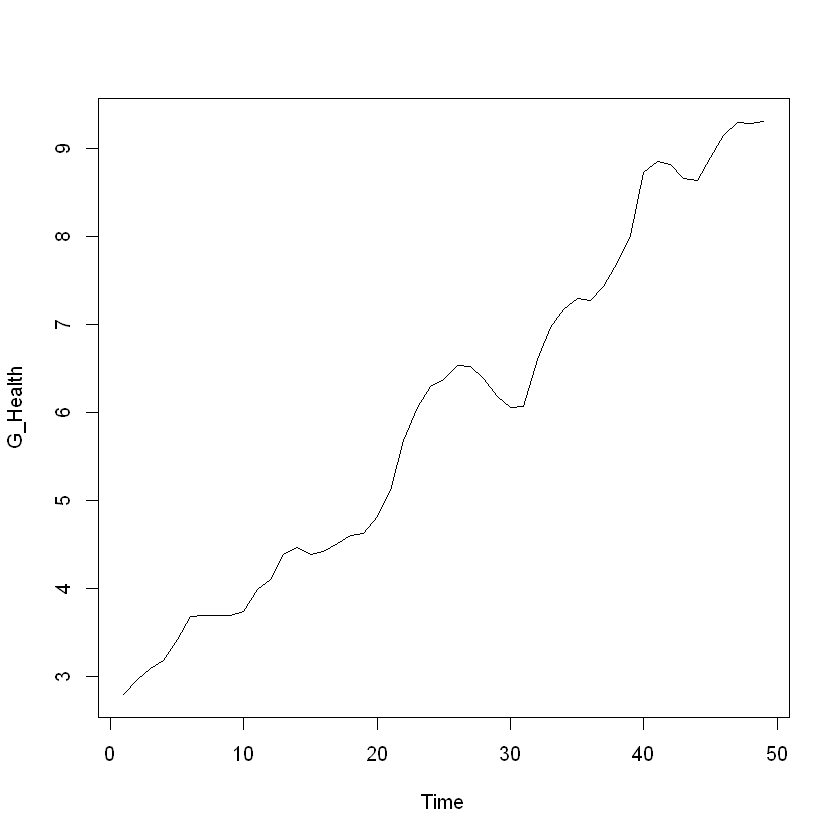

In [6]:
plot(dfts[,1], ylab="G_Health")

Just from plotting the graph, it becomes very obvious that the series is non-stationary. But let's proceed with the formal Augmented Dickey-Fuller test.

In [7]:
adf.test(dfts[,1])


	Augmented Dickey-Fuller Test

data:  dfts[, 1]
Dickey-Fuller = -2.5975, Lag order = 3, p-value = 0.3351
alternative hypothesis: stationary


$H_0$: Non - Stationarity<br>
$H_1$: Stationarity

Given the p-value of 0.3351, we do not reject the null hypothesis of non-stationarity, for a 5% significance level. <br>
We conclude that the Health expenditure series is non-stationary.

__Testing for Total Revenue__ (Revenue_total)

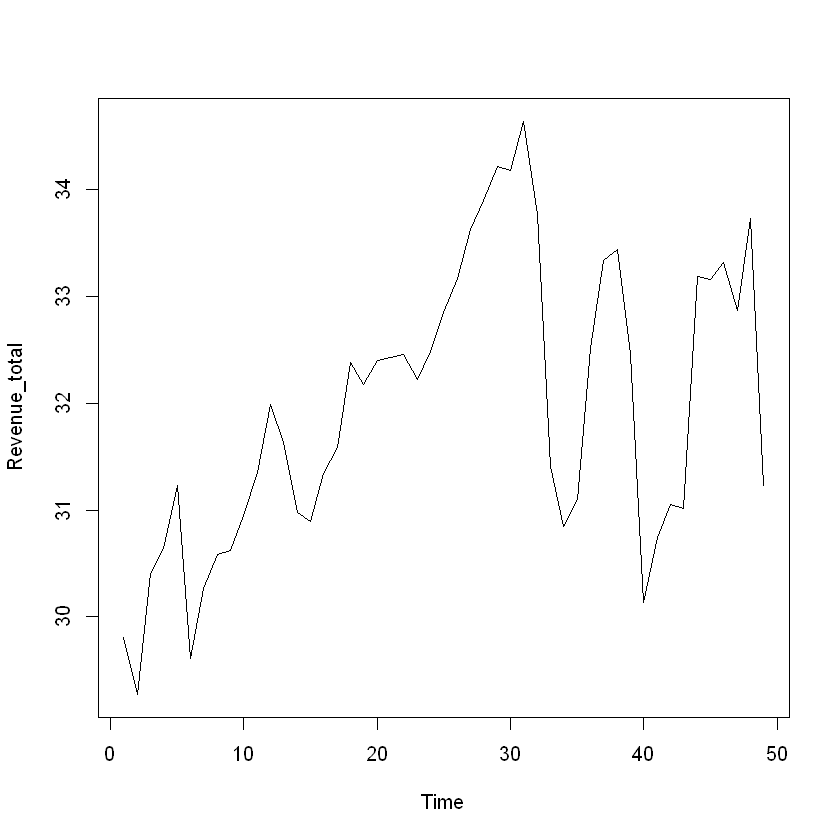

In [8]:
plot(dfts[,2], ylab="Revenue_total")

It is a bit harder to conclude straight away from looking at the plotted values that there exists a unit root. Let's proceed to the formal testing.

In [9]:
adf.test(dfts[,2])


	Augmented Dickey-Fuller Test

data:  dfts[, 2]
Dickey-Fuller = -2.2865, Lag order = 3, p-value = 0.4595
alternative hypothesis: stationary


From this result, and given the p-value of 0.4595, we also conclude for non-stationarity of the total revenue series, at a 5% significance level.

Other than this, since the adf.test function detrends the series for testing, to grant the test more power, we can conclude that detrending would not make the series stationary.<br>
And given both series are non-stationary, our only chance at relating them with each other is if there exists some kind of cointegration between them.

### EXERCISE 1C

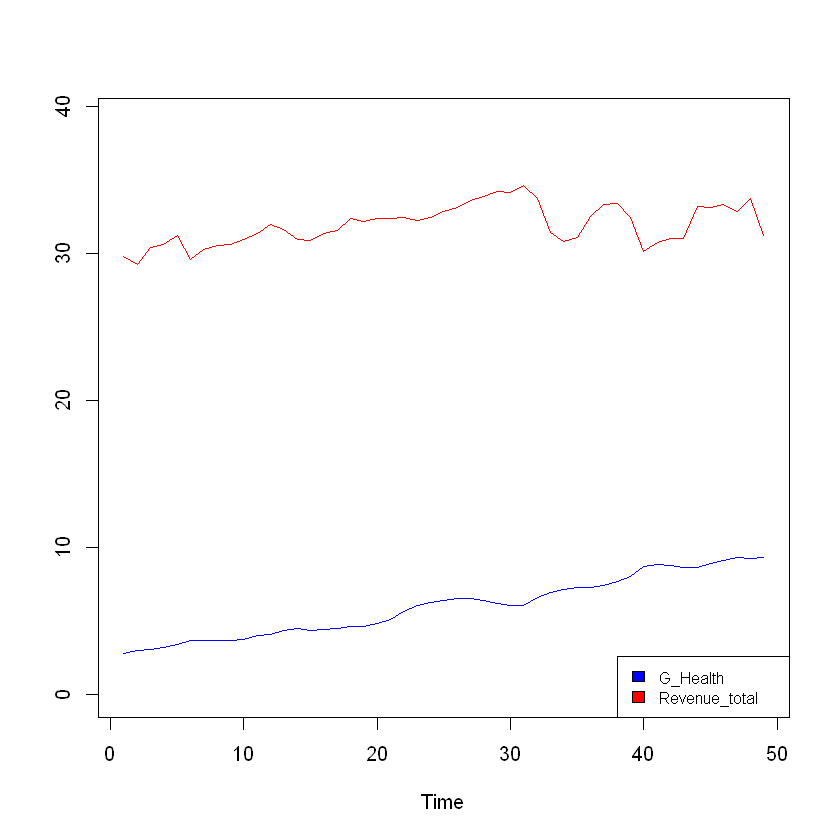

In [10]:
ts.plot(dfts[,1], dfts[,2], gpars = list(col = c("blue", "red")), ylim=c(0,39))
legend("bottomright", c("G_Health","Revenue_total"), fill=c("blue","red"),cex=0.8)

Throughout this exercise, we will number the steps taken regarding the __Johansen methodology.__

__1. Pretesting the variables for their order of integration__

Since the adf.test in levels shows us existence of unit root in both series, let us see if first-differencing makes the series stationary. If that is so, the series are I(1). If not, it is possible that the series are I(2) or integrated of higher order.

In [11]:
adf.test(diff(dfts[,1]))

Warning message in adf.test(diff(dfts[, 1])):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(dfts[, 1])
Dickey-Fuller = -4.2857, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


The Health Expenditure series in first differences is stationary. As such, we conclude that the original series is I(1).

In [12]:
adf.test(diff(dfts[,2]))

Warning message in adf.test(diff(dfts[, 2])):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(dfts[, 2])
Dickey-Fuller = -4.8024, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary


The Total Revenue series in first differences is also stationary. So, the original series is also I(1).

Both series are integrated of order 1. This means there can exist cointegration among them, as being integrated of the same order is a prerequisite for cointegration.

__2. Selecting the order of the VAR with undifferenced data__

In [11]:
VARselect(dfts)

,1,2,3,4,5,6,7,8,9,10
AIC(n),-3.60668605,-3.8827854,-3.74653908,-3.64388899,-3.57176294,-3.5504434,-3.43964759,-3.75869985,-3.81399820,-3.80339053
HQ(n),-3.51485965,-3.7297414,-3.53227748,-3.36840978,-3.23506614,-3.1525290,-2.98051559,-3.23835025,-3.23243100,-3.16060573
SC(n),-3.35075349,-3.4562312,-3.14936311,-2.87609130,-2.63334355,-2.4414023,-2.15998478,-2.30841534,-2.19309198,-2.01186261
FPE(n),0.02715818,0.0206519,0.02378556,0.02659695,0.02900372,0.0302735,0.03486581,0.02641902,0.02642897,0.02874501


All criteria point towards 2 lags, so we select 2 as the significant number of lags to include.

__3. Estimating the model and determining the rank of $\pi$.__

In [14]:
vecm1=ca.jo(dfts, type="trace", K=2, spec="longrun",ecdet="const")
summary(vecm1)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 2.669163e-01 1.250291e-01 2.775558e-16

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 |  6.28  7.52  9.24 12.97
r = 0  | 20.87 17.85 19.96 24.60

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                 G_Health.l2 Revenue_Total.l2    constant
G_Health.l2         1.000000         1.000000  1.00000000
Revenue_Total.l2   -4.930188        -1.458496  0.02283146
constant          155.651228        37.145650 -5.48496805

Weights W:
(This is the loading matrix)

                 G_Health.l2 Revenue_Total.l2      constant
G_Health.d      -0.004587278     -0.016447223 -1.509798e-17
Revenue_Total.d  0.071273797     -0.004609789 -5.053070e-17


This is the $\lambda_{trace}$ test.<br>
$H_0$: rank of $\pi$ < = r <br>
$H_1$: rank of $\pi$ > r
<br>
<br>
We reject the null hypothesis for r=0 at a 10% significance level. (We also reject it at 5%, but the reason for choosing 10% becomes evident with the next test.) __This means that the rank of $\pi$ is at least 1.__

In [15]:
vecm2=ca.jo(dfts, type="eigen",K=2,spec="longrun",ecdet="const")
summary(vecm2)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 2.669163e-01 1.250291e-01 2.775558e-16

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 |  6.28  7.52  9.24 12.97
r = 0  | 14.59 13.75 15.67 20.20

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                 G_Health.l2 Revenue_Total.l2    constant
G_Health.l2         1.000000         1.000000  1.00000000
Revenue_Total.l2   -4.930188        -1.458496  0.02283146
constant          155.651228        37.145650 -5.48496805

Weights W:
(This is the loading matrix)

                 G_Health.l2 Revenue_Total.l2      constant
G_Health.d      -0.004587278     -0.016447223 -1.509798e-17
Revenue_Total.d  0.071273797     -0.004609789 -5.053070e-17


This is the $\lambda_{max}$ test.<br>
$H_0$: rank of $\pi$ = r<br>
$H_1$: rank of $\pi$ = r+1 <br>
<br>
We reject the null hypothesis for r=0 at a 10% significance level (although here we do not reject at the 5% level). And we do not reject the null hypothesis for r=1 at any significance level. <br> We thus conclude the rank of $\pi$ to be 1.
<br>
__This means that Health Revenue and Total Expenditure are cointegrated of order 1.__
<br>
<br>

__4. Cointegrating vector__

In [14]:
coint = matrix(c(1.00000000 , -4.930188, 155.651228)) 
rownames(coint)= c('G_health', 'Revenue_Total', 'constant') 
colnames(coint)= c('Cointegrating Vector') 
library(knitr) 
kable(coint)



|              | Cointegrating Vector|
|:-------------|--------------------:|
|G_health      |             1.000000|
|Revenue_Total |            -4.930188|
|constant      |           155.651228|

Note: When "Health Expenditure" is mentioned, please note that we we refer to Health expenditure as share of the GDP - that is our data. We just use health expenditure so as to abbreviate the writing and avoid repetition.<br>
<br>
__Interpretation__:<br>
The cointegrating vector shows us the long-run equilibrium relationship between Health Expenditure (as share of GDP) and Total Revenue. Given our results, and knowing that the Health Expenditure vector is normalized \[i.e. we have a (1, -$\beta$) vector], we can conclude that in the long-run Health Expenditure and Total Revenue are directly related: if total revenue increases in the long-run, health expenditure as a share of GDP will also increase. Or, to make it a bit easier to reason: if total revenue decreases in the long-run, health expenditure as a share of GDP will also decrease. When looking at economic theory, there is not a very clear reason for this. Theoretically, when *total* revenue falls, *total* health expenditure should also fall (as all expenditures in general), but what we have here is health expenditure *as share of GDP*. What this means, essentially, is that with total revenue variations, health expenditure varies disproportionately more, since the Health Expenditure series comes as share of the GDP. In practice, it means that the US government prioritizes other expenses when total revenue falls, and Health Expenditure - becoming a lesser priority in these times - falls more in absolute terms than the Revenue. Or in a case when total revenue rises, health expenditure gets a bigger boost.

### EXERCISE 1D

__Coefficients of adjustment__

In [15]:
speed_adjust = matrix(c(-0.004587278 ,0.071273797)) 
rownames(speed_adjust)= c('G_health', 'Revenue_Total') 
colnames(speed_adjust)= c('Adjustment Coefficients') 
kable(speed_adjust)



|              | Adjustment Coefficients|
|:-------------|-----------------------:|
|G_health      |              -0.0045873|
|Revenue_Total |               0.0712738|

__Interpretation__:<br>
Looking into the short-run dynamics, we see that Health Expenditure falls in the short-run when there are positive deviations from the long-run equilibrium. But it is a barely significant fall (very small reaction of just about -0.4% each period). Total Revenue, however, increases - and from the magnitude of the Total Revenue we can see that it is Total Revenue that does the adjustment and more than offsets the decrease in Health Expenditure, thus leading to the return to long-term equilibrium fairly quickly.<br>
Total Revenue reacts to a positive deviation from the long-run equilibrium by around +7% each period.

### EXERCISE 1E

*__"Transform your VECM into the VAR representation using the vec2var() function. Get the IRFs and plot them for the next 30 steps (30 years). Interpret them."__*

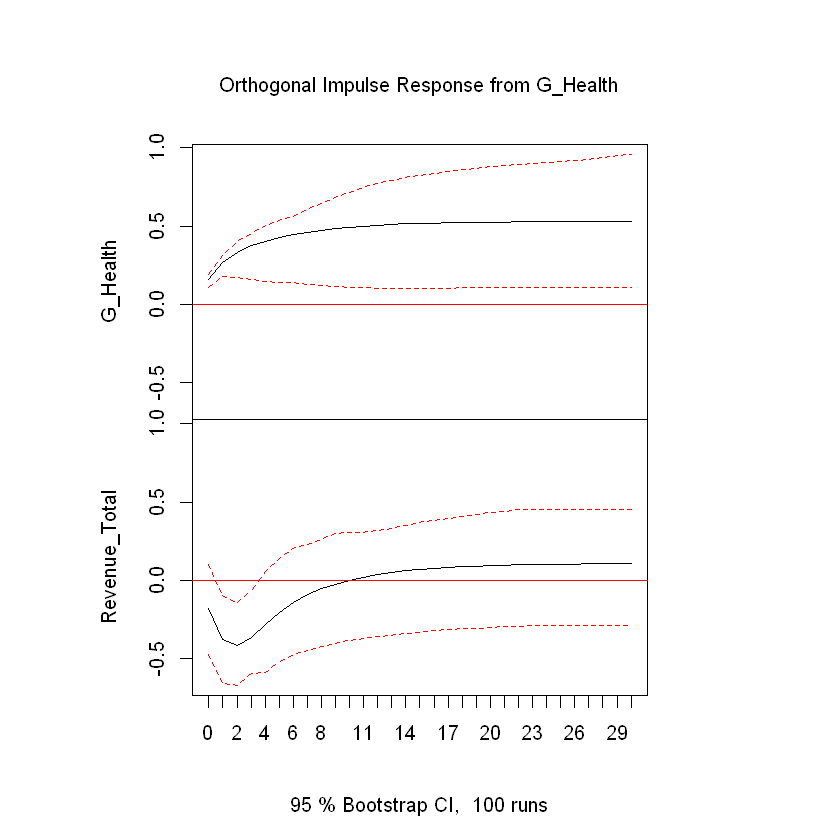

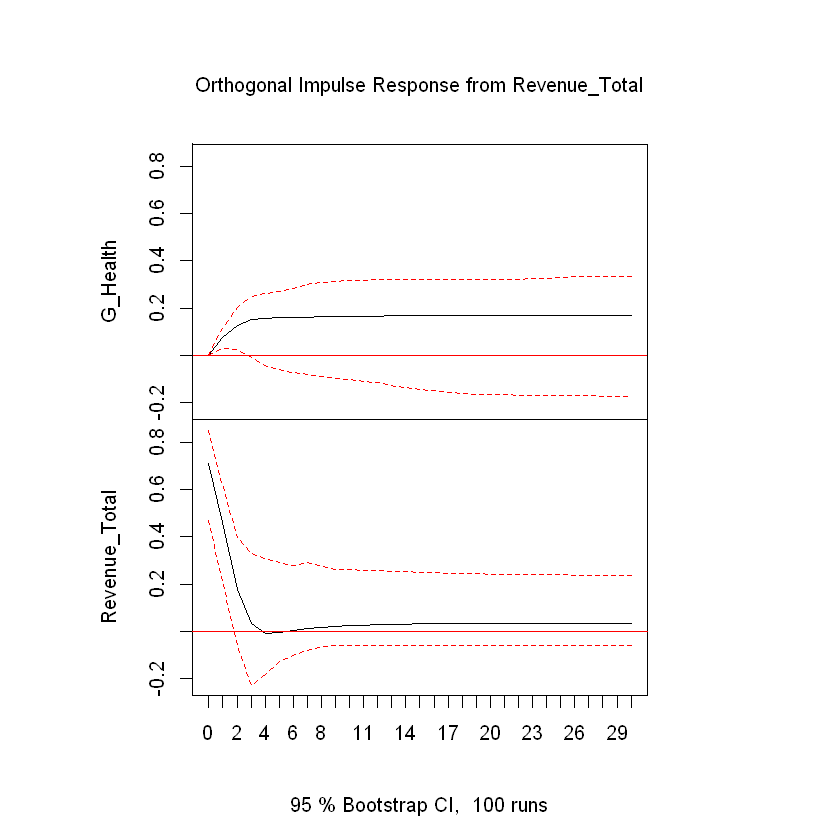

In [19]:
var1=vec2var(vecm1, r=1)
irf1=irf(var1, n.ahead=30, ci=0.95, runs=100)
plot(irf1)

__Interpretation for Health Expenditure IRF__<br>
A one standard-deviation increase to Health Expenditure in percent of GDP (~20%) leads to a contemporaneous fall in Total Revenue of about 40%. The shock wanes after a few periods and is not persistent in the long run.

__Interpretation for Total Revenue IRF__<br>
A one standard-deviation increase in Total Revenue (~70%) generates a positive effect on Health Expenditure. The contemporaneous response is zero by assumption (Cholesky decomposition). Although there seems to be some persistence in the long run, strictly speaking our confidence interval includes zero, and with this said we can not really conclude for persistence.

__Note__: There seems to be a contradiction between what we get in terms of short-run dynamics (adjustment coefficients) and the IRFs. The values of the adjustment coefficient indicate that total revenue is supposed to increase in response to a positive deviation from the long-run equilibrium. However, the Impulse Response Functions point to the contrary. We have noticed this incoherence but do not exactly know how to explain it.

*__"Estimate a VAR using the same dataset."__* 

In [17]:
var2=VAR(dfts, lag.max=6, ic="AIC")
irf2=irf(var2, n.ahead=30, ci=0.95, runs=100)
var2


VAR Estimation Results:

Estimated coefficients for equation G_Health: 
Call:
G_Health = G_Health.l1 + Revenue_Total.l1 + G_Health.l2 + Revenue_Total.l2 + const 

     G_Health.l1 Revenue_Total.l1      G_Health.l2 Revenue_Total.l2 
      1.63467737       0.08840659      -0.65571187      -0.04180224 
           const 
     -1.32495826 


Estimated coefficients for equation Revenue_Total: 
Call:
Revenue_Total = G_Health.l1 + Revenue_Total.l1 + G_Health.l2 + Revenue_Total.l2 + const 

     G_Health.l1 Revenue_Total.l1      G_Health.l2 Revenue_Total.l2 
     -1.72025180       0.64443056       1.78691580       0.01089955 
           const 
     10.92262046 



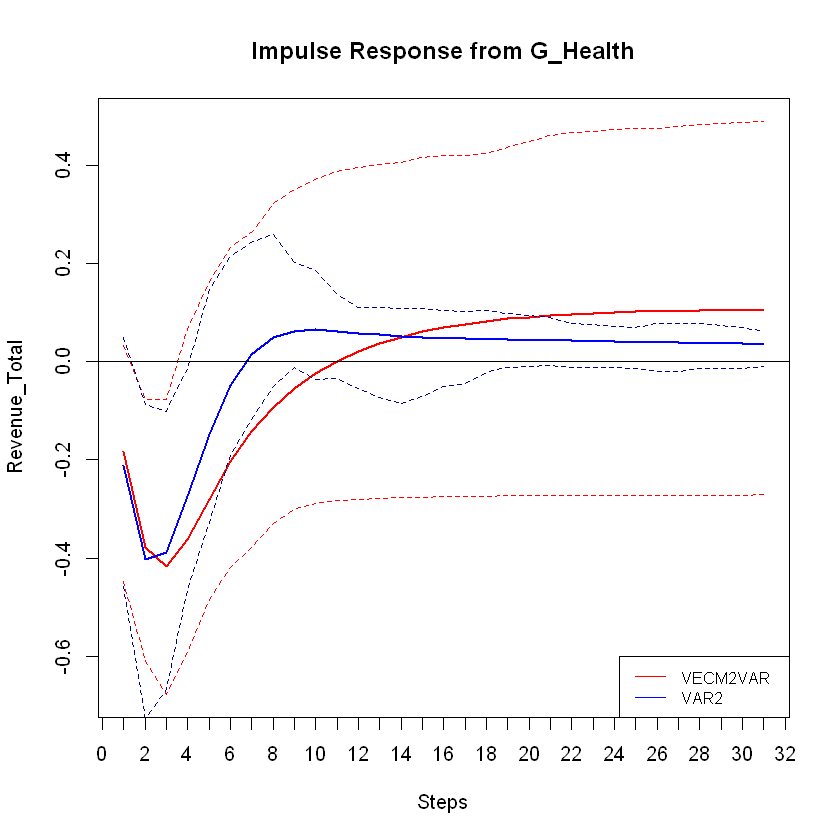

In [18]:
stepSize = 1
xMax = 50
numTicks = xMax / stepSize
v1 = c(0:numTicks)*stepSize
plot(irf1$irf$G_Health[,2], type ='l',lwd=2, col="red", main="Impulse Response from G_Health", ylab="Revenue_Total", xlab="Steps", xaxt="n", ylim=range(irf1$Lower$G_Health[,2],irf1$Upper$G_Health[,2]))
lines(irf1$Upper$G_Health[,2], lty=2, col="red")
lines(irf1$Lower$G_Health[,2], lty=2, col="red")
lines(irf2$irf$G_Health[,2], type='l', lwd=2, col="blue", ylim=range(irf1$Lower$G_Health[,2],irf1$Upper$G_Health[,2]))
lines(irf2$Upper$G_Health[,2], type='l', lty=2, col="darkblue",ylim=range(irf1$Lower$G_Health[,2],irf1$Upper$G_Health[,2]))
lines(irf2$Lower$G_Health[,2], type='l', lty=2, col="darkblue",ylim=range(irf1$Lower$G_Health[,2],irf1$Upper$G_Health[,2]))
axis(side=1, at=v1, labels=v1)
abline(h=0)
legend('bottomright', legend=c("VECM2VAR", "VAR2"), col=c("red", "blue"), lty=c(1,1), cex=0.8)


The VECM transformed to VAR model is very similar to the VAR model using the same dataset. But the VECM imposes further restrictions on the short-run dynamics in order to get a long-run equilibrium. That is essentially where the differences between the two models come from. <br>
<br>
Regarding the current COVID-19 crisis, the measures put in place correspond to a positive (and very large in magnitude) shock in Health Expenditure. Extrapolating from our IRFs, we may theorize that tax revenue will have a significant drop over the next 2 to 4 years. The shock will then wane and in the long-run (>10 years) its impact disappears.

## Part 2

### EXERCISE 2A

First, we are going to import the data:

In [33]:
library("quantmod")
getSymbols("CPIAUCSL", src= "FRED")
CPI1= CPIAUCSL
cpi1= window(CPI1, start = "1959-01-01", end="2020-02-01") #Selecting a subset of the data; We also had to cut until february, because the two first variables has already the data to March qhile the other two didn't

getSymbols("CPILFESL", src="FRED")
CPI2= CPILFESL
cpi2= window(CPI2, start = "1959-01-01",end="2020-02-01")

getSymbols("PCEPI", src= "FRED")
PCEPI1= PCEPI
pcepi1=window(PCEPI1, start = "1959-01-01",end="2020-02-01")

getSymbols("PCEPILFE", src= "FRED")
PCEPI2=PCEPILFE 
pcepi2=window(PCEPI2, start = "1959-01-01",end="2020-02-01")



[1] "CPIAUCSL"

[1] "CPILFESL"

[1] "PCEPI"

[1] "PCEPILFE"

In [34]:
data= data.frame(cpi1,cpi2,pcepi1,pcepi2)
head(data)

,CPIAUCSL,CPILFESL,PCEPI,PCEPILFE
1959-01-01,29.01,29.9,16.074,16.727
1959-02-01,29.00,29.9,16.089,16.740
1959-03-01,28.97,30.0,16.100,16.759
1959-04-01,28.98,30.0,16.132,16.801
1959-05-01,29.04,30.1,16.140,16.822
1959-06-01,29.11,30.2,16.186,16.871


Now, we are going to trasnform the data into the first differences of the log and generate a new data frame with the differences data

In [35]:
inf1= diff(log(cpi1))
inf1 = ts(inf1, start = 1959, deltat = 1/12)

inf2= diff(log(cpi2))
inf2 = ts(inf2, start = 1959, deltat = 1/12)

inf3= diff(log(pcepi1))
inf3= ts(inf3, start = 1959, deltat = 1/12)

inf4=diff(log(pcepi2))
inf4 = ts(inf4, start = 1959, deltat = 1/12)


In [36]:
data=ts(data.frame(inf1, inf2, inf3, inf4), start=1959, deltat=1/12)

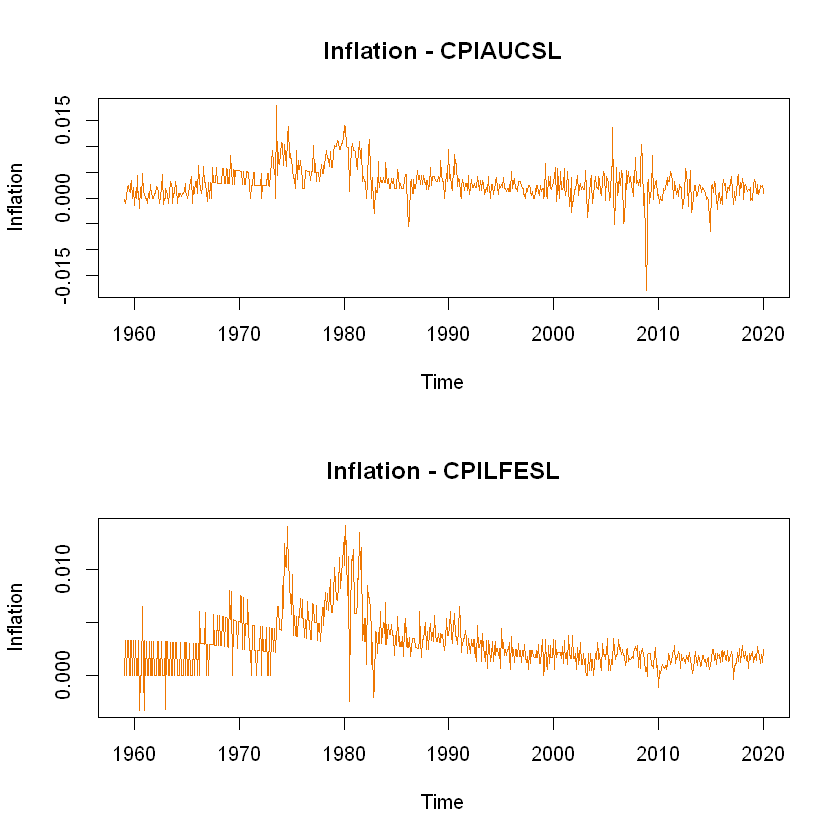

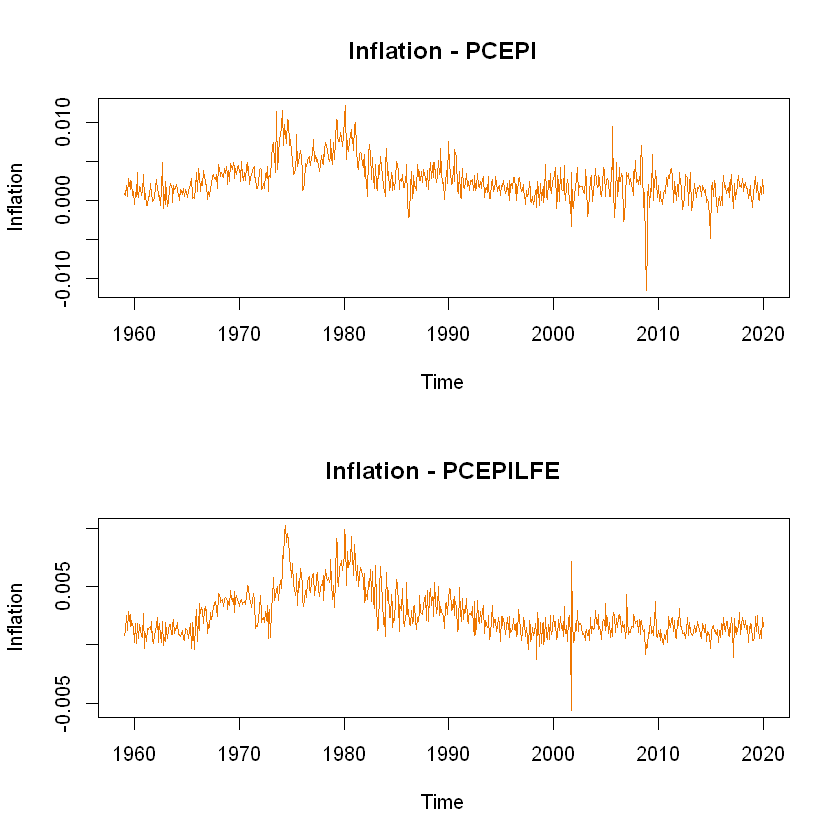

In [37]:
par(mfrow=c(2,1))
plot(inf1, main="Inflation - CPIAUCSL", ylab="Inflation", col="darkorange2")
plot(inf2, main="Inflation - CPILFESL", ylab="Inflation", col="darkorange2")
plot(inf3, main="Inflation - PCEPI", ylab="Inflation", col="darkorange2")
plot(inf4, main="Inflation - PCEPILFE", ylab="Inflation", col="darkorange2")

### EXERCISE 2B

In [38]:
library("dlm")

Given the true model for inflation follows a random walk our FF coefficient will be 1. 

First, let's set up the state space model:

In [39]:
dlm1= dlm(FF= 1, V = 0.1, GG = 1, W = 0.2, m0 = 0, C0 = 0.5)

list(dlm1)

[[1]]
$FF
     [,1]
[1,]    1

$V
     [,1]
[1,]  0.1

$GG
     [,1]
[1,]    1

$W
     [,1]
[1,]  0.2

$m0
[1] 0

$C0
     [,1]
[1,]  0.5



Now, we are going to apply the Kalmen Filter:

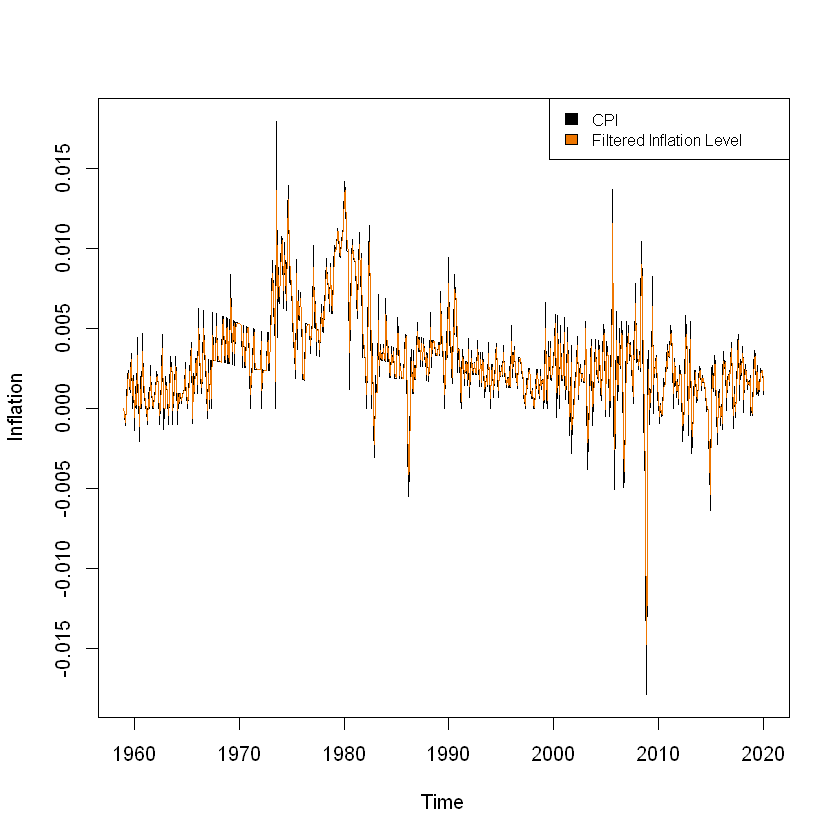

In [40]:
kfilter1 = dlmFilter(inf1, dlm1)
plot(inf1, type = 'l', col="black", ylab="Inflation") 
lines(dropFirst(kfilter1$m), type = 'l',pch = 20, col = "darkorange2")
legend("topright", c("CPI","Filtered Inflation Level"), fill=c("black","darkorange2"),cex=0.8)

Kalman filter is an iterative method that uses consecutive data inputs to keep updating its estimates. In this case, the true inflation is our unobservable variable that we are interested in estimating. We are using the diff(log(CPI)) as the measurement variable. 

So, what Kalman filter does is calculating a different posterior each time it receives a new input since the goal is to use all information available to estimate our variable of interest. <br>
Posterior:<br>
$ \theta_t| D_{t-1} $<br>

 In the first period, the posterior will be a linear combination between the prior - our initial guess about the value of the true inflation - and the Kalman Gain prediction error (The second term takes into account the new information received in time t, minimizing the differences between our forecasts about the measurement variable and new input received by the variable).
 In time 4,for example, the true inflation estimate will be a linear combination between the prior (the estimate of period 3) and the Kalman Gain prediction error. This posterior will then be used as the prior for period 5 estimation, and so on and so forth until we reach an accurate estimate of the real inflation rate.

### EXERCISE 2C

In [41]:
library("dlm")
FF1 = matrix(c(1,1,1,1), byrow=TRUE, nrow=4) # Now, our FF matrix will a a 4*1
VV1= diag(4)
FF1
VV1

1
1
1
1


1,0,0,0
0,1,0,0
0,0,1,0
0,0,0,1


In [42]:
dlm2= dlm(FF=FF1, V = VV1, GG =1, W = 0.2, m0 = 0, C0 = 0.5)
list(dlm2)

[[1]]
$FF
     [,1]
[1,]    1
[2,]    1
[3,]    1
[4,]    1

$V
     [,1] [,2] [,3] [,4]
[1,]    1    0    0    0
[2,]    0    1    0    0
[3,]    0    0    1    0
[4,]    0    0    0    1

$GG
     [,1]
[1,]    1

$W
     [,1]
[1,]  0.2

$m0
[1] 0

$C0
     [,1]
[1,]  0.5



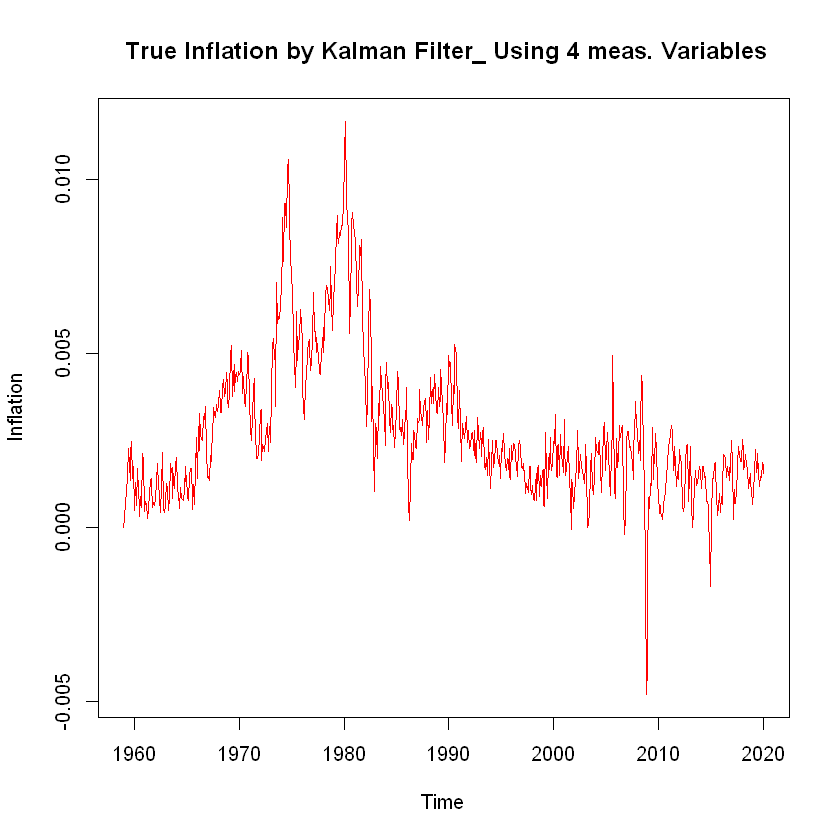

In [43]:
kfilter2 = dlmFilter(c(inf1,inf2,inf3,inf4), dlm2)
plot(ts(dropFirst(kfilter2$m), start=1959, deltat=1/12), type = 'l', pch = 20, col = "red", main= " True Inflation by Kalman Filter_ Using 4 meas. Variables", ylab="Inflation")


__In order to make the comparison between b) and c) let's put them in the same graph.__

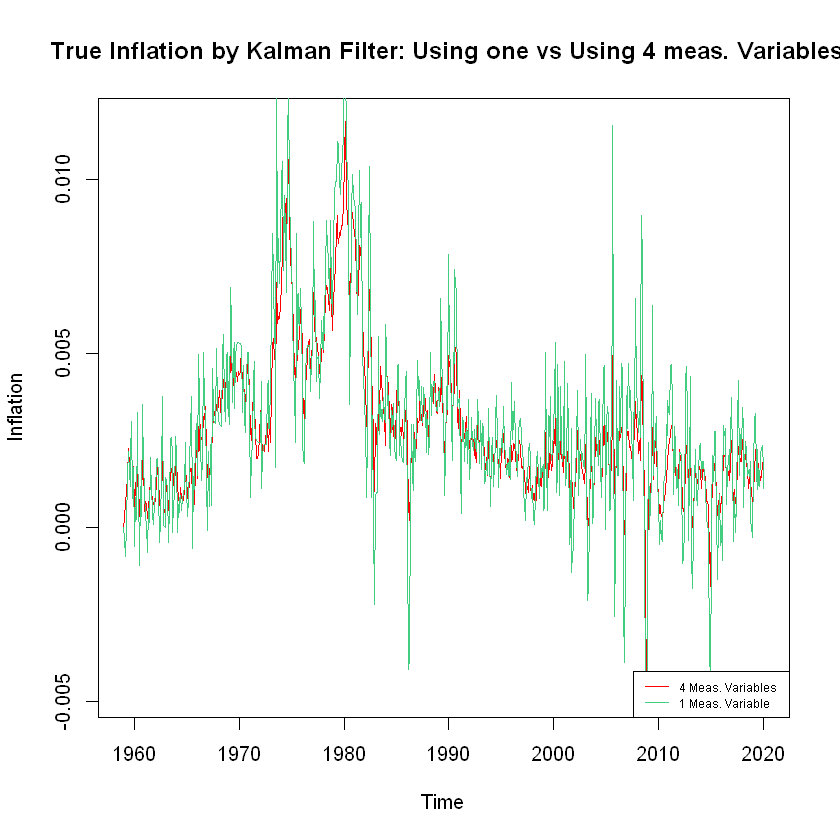

In [30]:
plot(ts(dropFirst(kfilter2$m), start=1959, deltat=1/12), type = 'l', pch = 20, col = "red", main= " True Inflation by Kalman Filter: Using one vs Using 4 meas. Variables", ylab="Inflation")
lines(dropFirst(kfilter1$m), type = 'l',pch = 20, col = "seagreen3")
legend("bottomright", legend=c("4 Meas. Variables", "1 Meas. Variable"), col=c("red", "seagreen3"), lty=1:1, cex=0.6)

In the green line, Kalman filter instead of just usig one measurement variable we are using 4 different variables. This means that for each time period, __our algorithm has more information to work with__. 
This implies that Kalman Filter can reach values closer to the true inflation faster and more accuratly. 
We can observe this in the graph, the red line is much more volatile while the green line is more precise and could reache the "true" value earlier.

In [31]:
m= c(-0.03,-0.01,0.01,0.03)

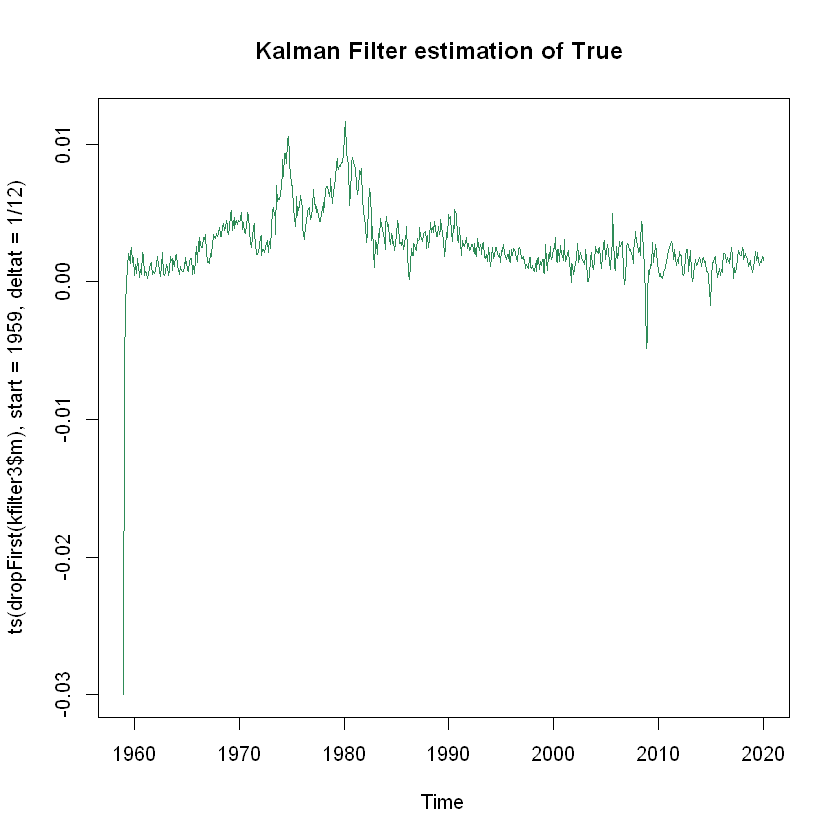

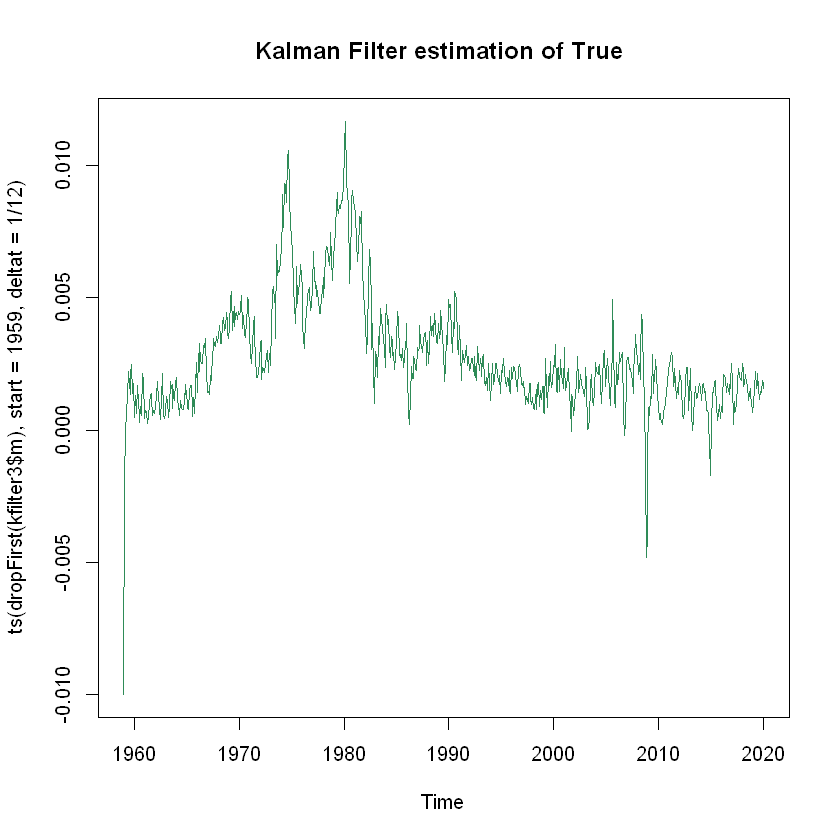

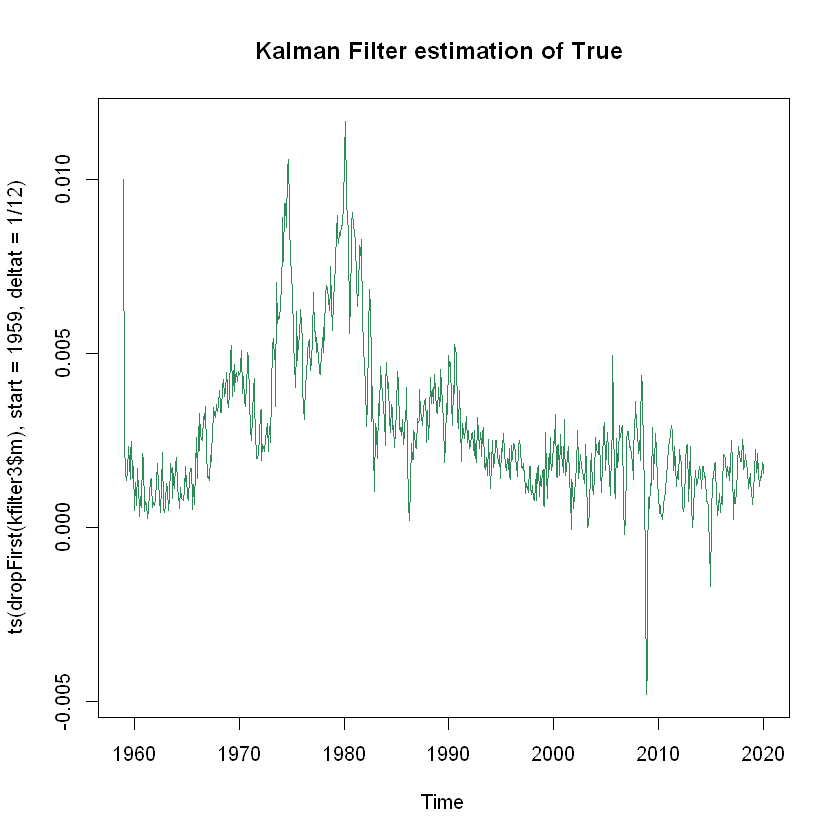

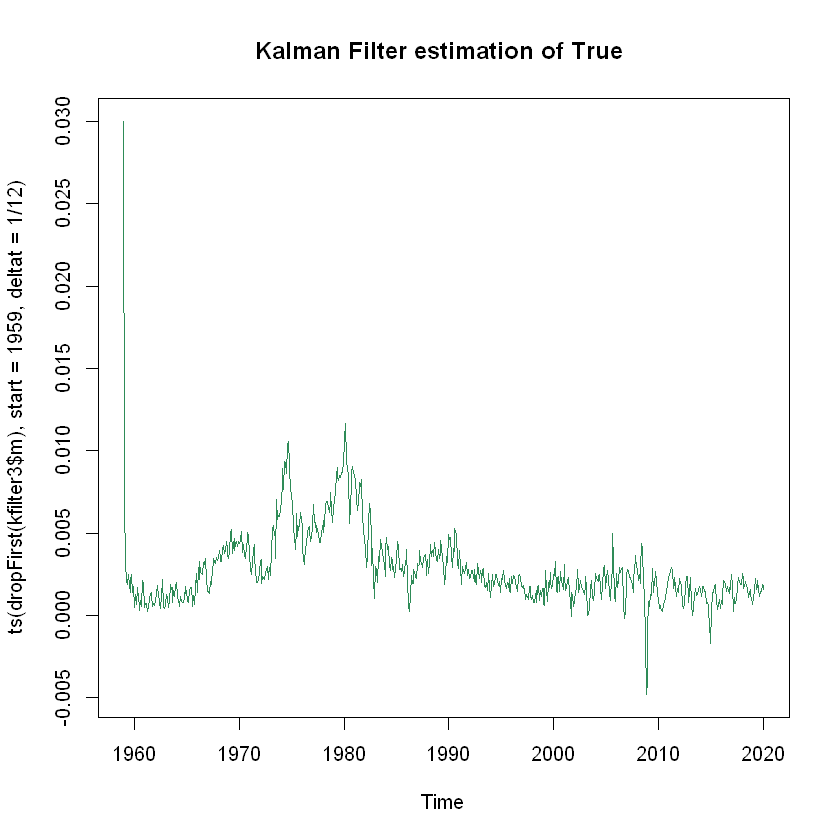

In [32]:
for (i in m) {
    
dlm(FF= matrix(c(1,1,1,1), byrow=TRUE, nrow=4) , V = diag(4), GG = 1, W = 0.2, m0 = i, C0 = 0.5)
kfilter3= dlmFilter(c(inf1,inf2,inf3,inf4), dlm(FF=matrix(c(1,1,1,1), byrow=TRUE, nrow=4), V =diag(4), GG =1, W = 0.2, m0 = i, C0 = 0.5))
plot(ts(dropFirst(kfilter3$m), start=1959, deltat=1/12), type = 'l',pch = 20, col = "seagreen", main="Kalman Filter estimation of True ")
    }
    

It is important to pay attention to the scale because it might bias our interpretation.  In zero, we only have the initial guess, so that is why the graphs are so different in the first point, however, as we get more observations from the measurement variables, the kalman filter will calculate new priors based on past estimates and will adjust the weights, so the graphs, rapidly converge and start to be similiar to one another. Hence, in fact, the initial guess is not very important. 


### EXERCISE 2D

In order to apply the principal component analysis, we first need to scale the data. Regarding the stationarity, for this analysis, we are assuming the inflation data is stationary.

In [33]:
datans0=data[2:734,] #I am going to take off the first line since the prcomp comand can't use NA data
datas=scale(datans0, center = TRUE, scale = TRUE)

Now that we have our data scaled, we can move forward to the analysis of the principal components.

In [34]:
nrow(data)

[1] 734

In [35]:
head(datas) #Now, we are ready to apply the PC analysis

CPIAUCSL,CPILFESL,PCEPI,PCEPILFE
-1.0741488,-1.2097948,-0.69183700,-0.93290479
-1.2966910,0.1424151,-0.79324024,-0.75050283
-0.8517217,-1.2097948,-0.26356098,-0.05216895
-0.2961715,0.1379152,-0.86958284,-0.69193525
-0.1867738,0.1334452,0.08642992,0.15480622
-0.5202767,-1.2097948,-0.21768785,-0.12097829


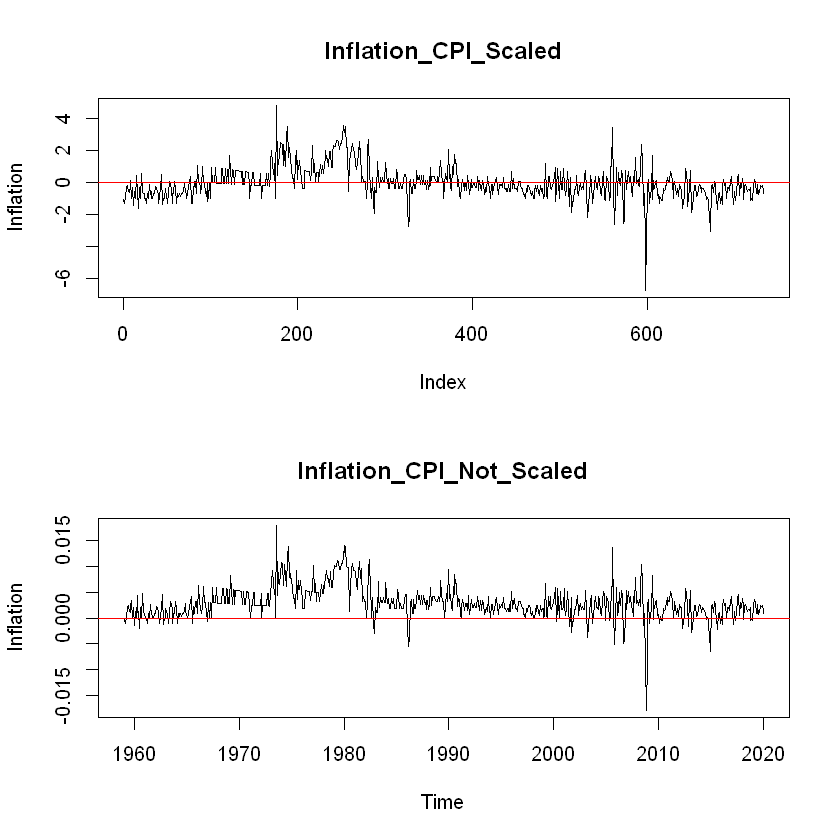

In [36]:
par(mfrow=c(2,1))
plot(datas[,1], main="Inflation_CPI_Scaled", ylab="Inflation", type="l")
abline(h=0,col="red")
plot(data[,1],main="Inflation_CPI_Not_Scaled", ylab="Inflation", type="l" )
abline(h=0, col="red")

In [37]:
pca <- prcomp(datas, center=FALSE, scale.=FALSE)  
summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.8038 0.6677 0.52647 0.15268
Proportion of Variance 0.8134 0.1115 0.06929 0.00583
Cumulative Proportion  0.8134 0.9249 0.99417 1.00000

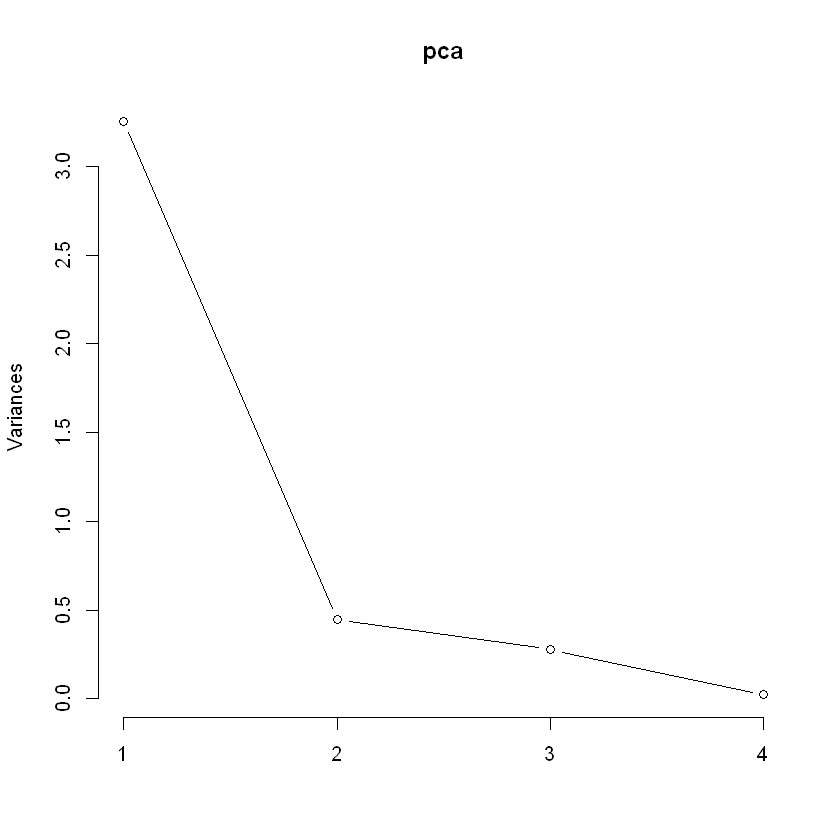

In [38]:
plot(pca, type='l') 

With one factor, we can explain around 81,34% of the variance of the data, which is very good. Our goal when using Principal component analysis is to try to reduce the dimensions, this is, try to explain the maximum variance we can with a lower number of variables. The decision of how many variables to choose is, indeed, subjective and depends on the purpose of the analysis.

Hence, instead of having four different variables, we will have a lower number of variables that will no longer be the ones we knew, but will correspond to the principal components. These principal components aggregate information from the different variables, and are orthogonal to each other. 

In [39]:
pca1 <- prcomp(datas, center=FALSE, scale.=FALSE, rank. = 1)  # Let's estimate the first component, as we have seen it is able to explain 54% of the variance of the data.

pca1$rotation #We get the factor loadings

head(pca1$x) # We get the values for the PC1

pca1x=pca1$x #Storing those values


,PC1
CPIAUCSL,0.4999666
CPILFESL,0.4750217
PCEPI,0.5231357
PCEPILFE,0.5007164


PC1
-1.94076262
-1.37141322
-1.16451115
-0.88393628
0.09273731
-1.00925581


__Predicted time series vs raw data__

In [40]:
#we need to get the values for the standard deviation and the mean for each of the initial variables, inf1, inf2, inf3, inf4.


mean(datans0[,1]) #mean of inf1 not scaled 
sd(datans0[,1]) #Standard Dev of inf not scaled

mean(datans0[,2]) 
sd(datans0[,2]) 

mean(datans0[,3])
sd(datans0[,3]) 

mean(datans0[,4]) 
sd(datans0[,4]) 


[1] 0.002986877

[1] 0.00310166

[1] 0.002987247

[1] 0.002469218

[1] 0.002633532

[1] 0.002458359

[1] 0.002605224

[1] 0.001959834

In [41]:
predinf1= (pca1$x%*%pca1$rotation[1,1])*sd(datans0[,1])+mean(datans0[,1]) #the scaled predicted values for infcpi
 
predinf2=(pca1$x%*%pca1$rotation[2])*sd(datans0[,2])+mean(datans0[,2]) #the scaled predicted values for infcpilf

predinf3=(pca1$x%*%pca1$rotation[3])*sd(datans0[,3])+mean(datans0[,3]) #the scaled predicted values for infpcepi

predinf4=(pca1$x%*%pca1$rotation[4])*sd(datans0[,4])+mean(datans0[,4]) #the scaled predicted values for infpcepilfe



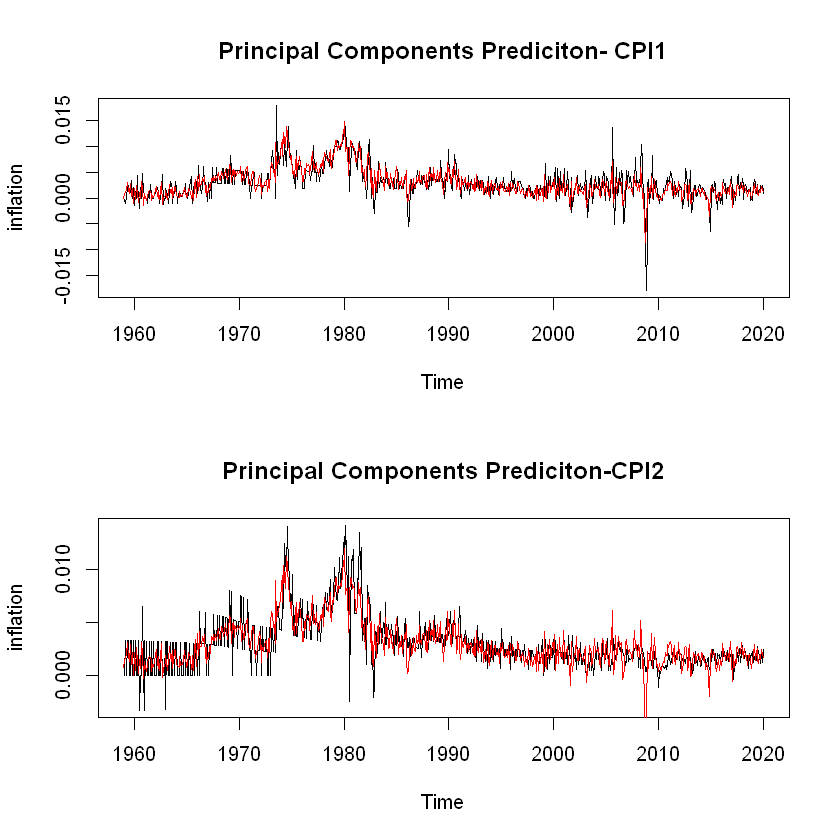

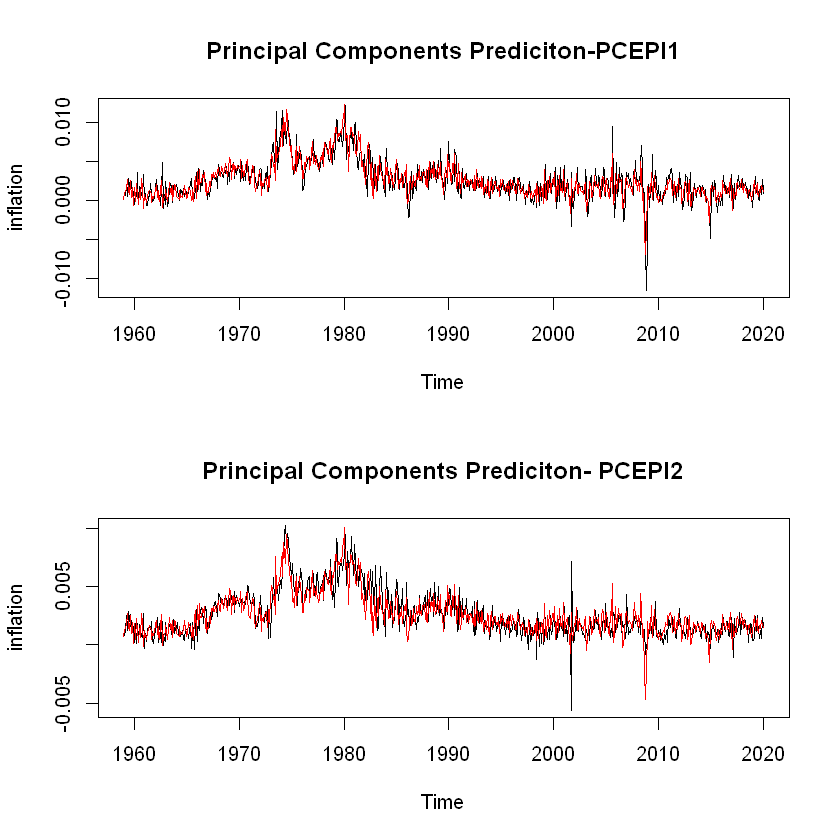

In [42]:
par(mfrow=c(2,1))

plot(ts(data[,1], start=1959, deltat = 1/12), type='l', main="Principal Components Prediciton- CPI1", ylab="inflation")
lines(ts(predinf1,start=1959, deltat = 1/12), type='l', col='red' )

plot(ts(data[,2], start=1959, deltat = 1/12), type='l', main="Principal Components Prediciton-CPI2", ylab="inflation")
lines(ts(predinf2,start=1959, deltat = 1/12), type='l', col='red' )

plot(ts(data[,3], start=1959, deltat = 1/12), type='l', main="Principal Components Prediciton-PCEPI1", ylab="inflation")
lines(ts(predinf3,start=1959, deltat = 1/12), type='l', col='red' )

plot(ts(data[,4], start=1959, deltat = 1/12), type='l', main="Principal Components Prediciton- PCEPI2", ylab="inflation")
lines(ts(predinf4,start=1959, deltat = 1/12), type='l', col='red' )





### EXERCISE 2E

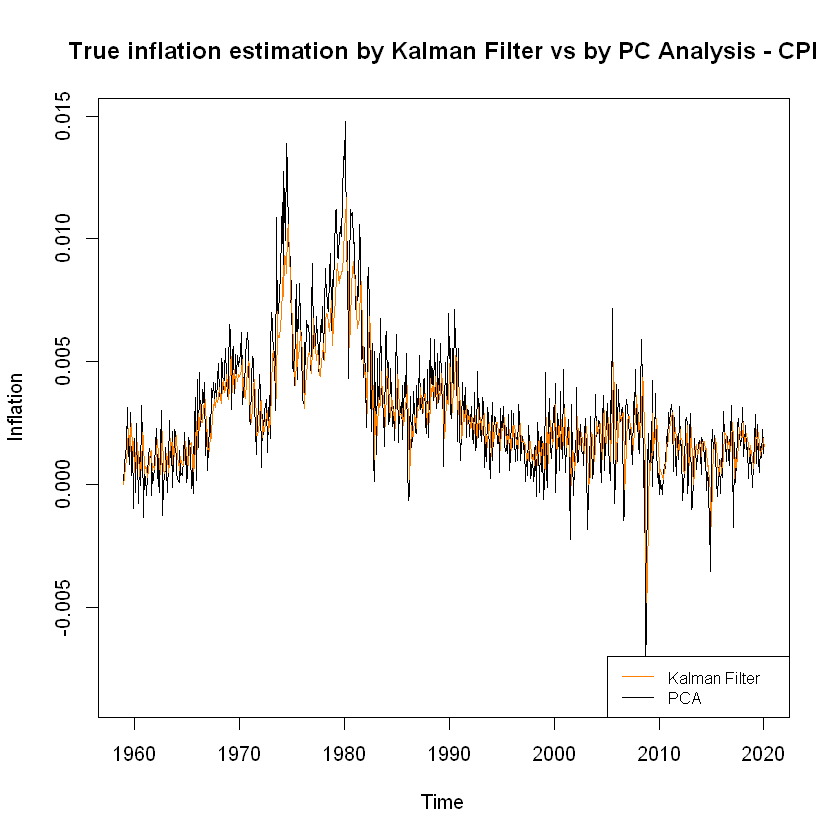

In [43]:
plot(ts(pca1$x%*%pca1$rotation[1,1]*sd(datans0[,1])+mean(datans0[,1]), start=1959, deltat=1/12), main="True inflation estimation by Kalman Filter vs by PC Analysis - CPI",type="l", ylab= "Inflation")

lines(ts(dropFirst(kfilter2$m), start=1959, deltat=1/12), type = 'l', pch = 20, col = "darkorange1", main= " True Inflation by Kalman Filter", ylab="Inflation")
legend("bottomright", legend=c("Kalman Filter", "PCA"), col=c("darkorange1", "black"), lty=1:1, cex=0.8)

Although the Principal Component Analysis and the Kalman filter use different mathematical approaches, in this case, their goal is similar: Find the true inflation series using different measurement variables. 
Kalman Filter uses an iteration method to calculate estimations of the true inflation having into account all the information available. PCA will create a new variable, using the information and the variance of the different measurement varaibles, and will be like a linear combination of the 4 inflation variables we have.
Although PCA and Kalman filter do it in a different manner, their goal is to capture the underlying behavior of an unobserved variable: inflation.
In this graph, as we would expect, we can see that PCA and Kalman Filter reach similiar conclusions regarding the behavior of the true inflation.